<a href="https://colab.research.google.com/github/forhigh/deeplearning_undergrad/blob/main/%5Bcomplete%5Dlab_07_2_FieldCompaction_kFoldCrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab_07_2 Deep Neural Nets
Field Compaction of Open-Graded Aggregates k-Fold Cross Validation

환경 준비

In [1]:
from tensorflow.keras.models import Sequential # 전체 라이브러리 중 일부 모듈만 호출
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Data_set = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/FieldCompaction1.csv", header=None)
X = Data_set.iloc[:, 0:2]
Y = Data_set.iloc[:, 2:5]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
k = 5
kfold = KFold(n_splits=k, shuffle=True) # KFold 함수 호출, 데이터셋 shuffle

acc_score = [] # 정확도(혹은 Loss)를 위한 빈 리스트 준비

딥러닝 모델 정의

In [4]:
def model_fn():
  model = Sequential()
  model.add(Dense(30, input_dim=2, activation='relu'))
  model.add(Dense(3))
  return model

k-fold cross valication (k겹 교차 검증) 학습 수행
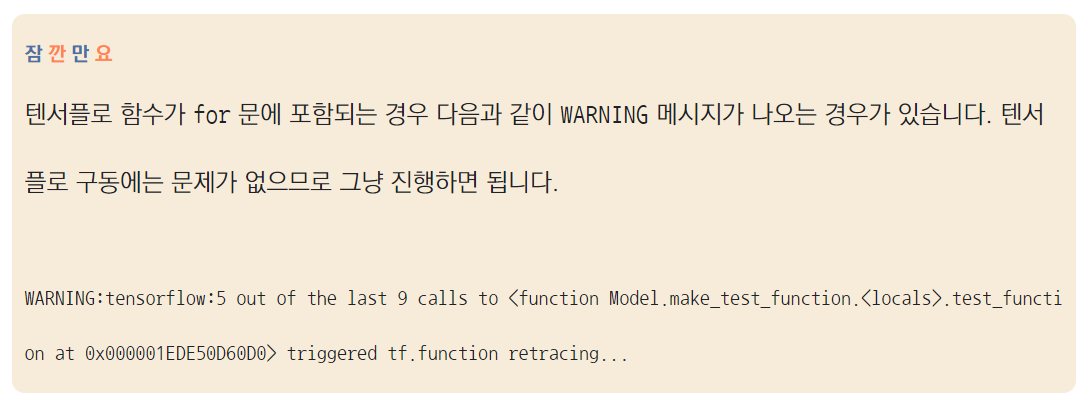



In [5]:
for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  Y_train, Y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

  model = model_fn()
  model.compile(loss='mean_squared_error', optimizer='adam')
  history = model.fit(X_train, Y_train, epochs=2000, verbose=0)

  accuracy = model.evaluate(X_test, Y_test)
  acc_score.append(accuracy) # 정확도(혹은 Loss) 리스트에 저장

1/1 [==============================] - 0s 84ms/step - loss: 423.7875


1/1 [==============================] - 0s 90ms/step - loss: 274.8073


정확도(혹은 손실) 평균 산정과 출력

In [6]:
avg_acc_score = sum(acc_score)/k

print('Loss: ', acc_score)
print('Avg Loss: ', avg_acc_score)

Loss:  [182.1533966064453, 317.87066650390625, 262.46820068359375, 423.7874755859375, 274.8072814941406]
Avg Loss:  292.2174041748047
